## Interquartile Range Method
#### Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

#### A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

#### We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

#### The IQR defines the middle 50% of the data, or the body of the data.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing dataset
df=pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


(array([   9.,   54.,  178.,  507.,  975., 1350., 1458., 1491., 1414.,
        1153.,  846.,  378.,  139.,   40.,    8.]),
 array([54.26313333, 55.91217393, 57.56121453, 59.21025513, 60.85929574,
        62.50833634, 64.15737694, 65.80641754, 67.45545814, 69.10449874,
        70.75353934, 72.40257994, 74.05162055, 75.70066115, 77.34970175,
        78.99874235]),
 <BarContainer object of 15 artists>)

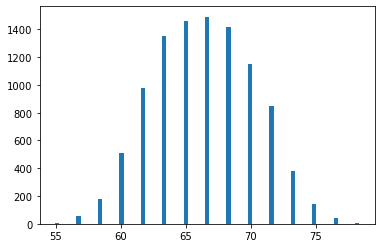

In [3]:
# displaying histogram of the data
plt.hist(df.height, bins=15, rwidth=.2)

### We can calculate the percentiles of a dataset using the quantile function that takes the dataset and specification of the desired percentile. The IQR can then be calculated as the difference between the 75th and 25th percentiles.

In [4]:
# calculating percentiles
q1, q3= df.height.quantile([.25, .75])
q1, q3

(63.505620480000005, 69.17426172750001)

#### The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

In [5]:
# calculating IQR
IQR=q3-q1

### The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.


In [6]:
# calculating lower limit outliers
lower_limit = q1-1.5*IQR

In [7]:
# calculating upper limit outliers
upper_limit = q3+1.5*IQR

### On a box and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots.

In [8]:
# displaying outlier values
df[(df.height<lower_limit) | (df.height>upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
7294,Female,54.873728
9285,Female,54.263133


In [9]:
df.shape

(10000, 2)

In [10]:
# obtaining dataset without outliers
df1=df[(df.height>lower_limit) & (df.height<upper_limit)]
df1.shape

(9992, 2)